In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#plot Dimention
plt.rcParams["figure.figsize"]=[13,10]

In [2]:
mobile=pd.read_csv("Mobile.csv")

In [3]:
mobile.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
mobile.columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [5]:
mobile.shape #shape 

(430, 16)

In [6]:
mobile.columns #columns

Index(['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM',
       'RAM', 'display_size', 'num_rear_camera', 'num_front_camera',
       'battery_capacity', 'ratings', 'num_of_ratings', 'sales_price',
       'discount_percent', 'sales'],
      dtype='object')

In [7]:
mobile.info() #data_types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [8]:
#check null values
mobile.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [9]:
mobile.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


# Univariate Analysis

In [10]:
#List of Categorical Variable
cat_var=['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM','RAM',
         'display_size', 'num_rear_camera', 'num_front_camera','battery_capacity', 'ratings',"discount_percent"]
print("Categorical_Variable:-",cat_var)

Categorical_Variable:- ['brand', 'model', 'base_color', 'processor', 'screen_size', 'ROM', 'RAM', 'display_size', 'num_rear_camera', 'num_front_camera', 'battery_capacity', 'ratings', 'discount_percent']


In [11]:
#List of Numerical Variable
num_var=[["num_of_ratings","sales_price","sales"]]
print("Numerical_Variable:-",num_var)

Numerical_Variable:- [['num_of_ratings', 'sales_price', 'sales']]


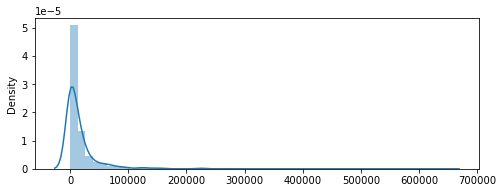

In [12]:
#check data is normally distributed or not 
# plot dimensions
plt.rcParams['figure.figsize']=[20, 10]
n_rows = 4
n_cols = 3
counter = 1
for i in num_var:
    plt.subplot(n_rows, n_cols, counter)
    sns.distplot(mobile.loc[:, i].dropna())
    counter = counter+1
    
plt.tight_layout() # to remove the clutters
plt.show()

In [13]:
#skewness of data
#if data is 0 to 0.5 than we assume data is normally distributed
#if data is more than +1 skew than we can say data is strongly postively skewd
#if data is more than -1 skew than we can say data is strongly negatively skewd 
mobile.skew()

ROM                 1.495005
RAM                 0.746886
display_size       -1.553612
num_rear_camera    -0.459102
num_front_camera    5.590313
battery_capacity   -0.283895
ratings            -1.732396
num_of_ratings      5.850073
sales_price         2.595228
discount_percent    1.301590
sales               4.789041
dtype: float64

In [14]:
#no_of_rating, sales, sales_price strong positive skewed
#discount_percent moderate positive skewed
#display_size, ratings moderate negative skewed

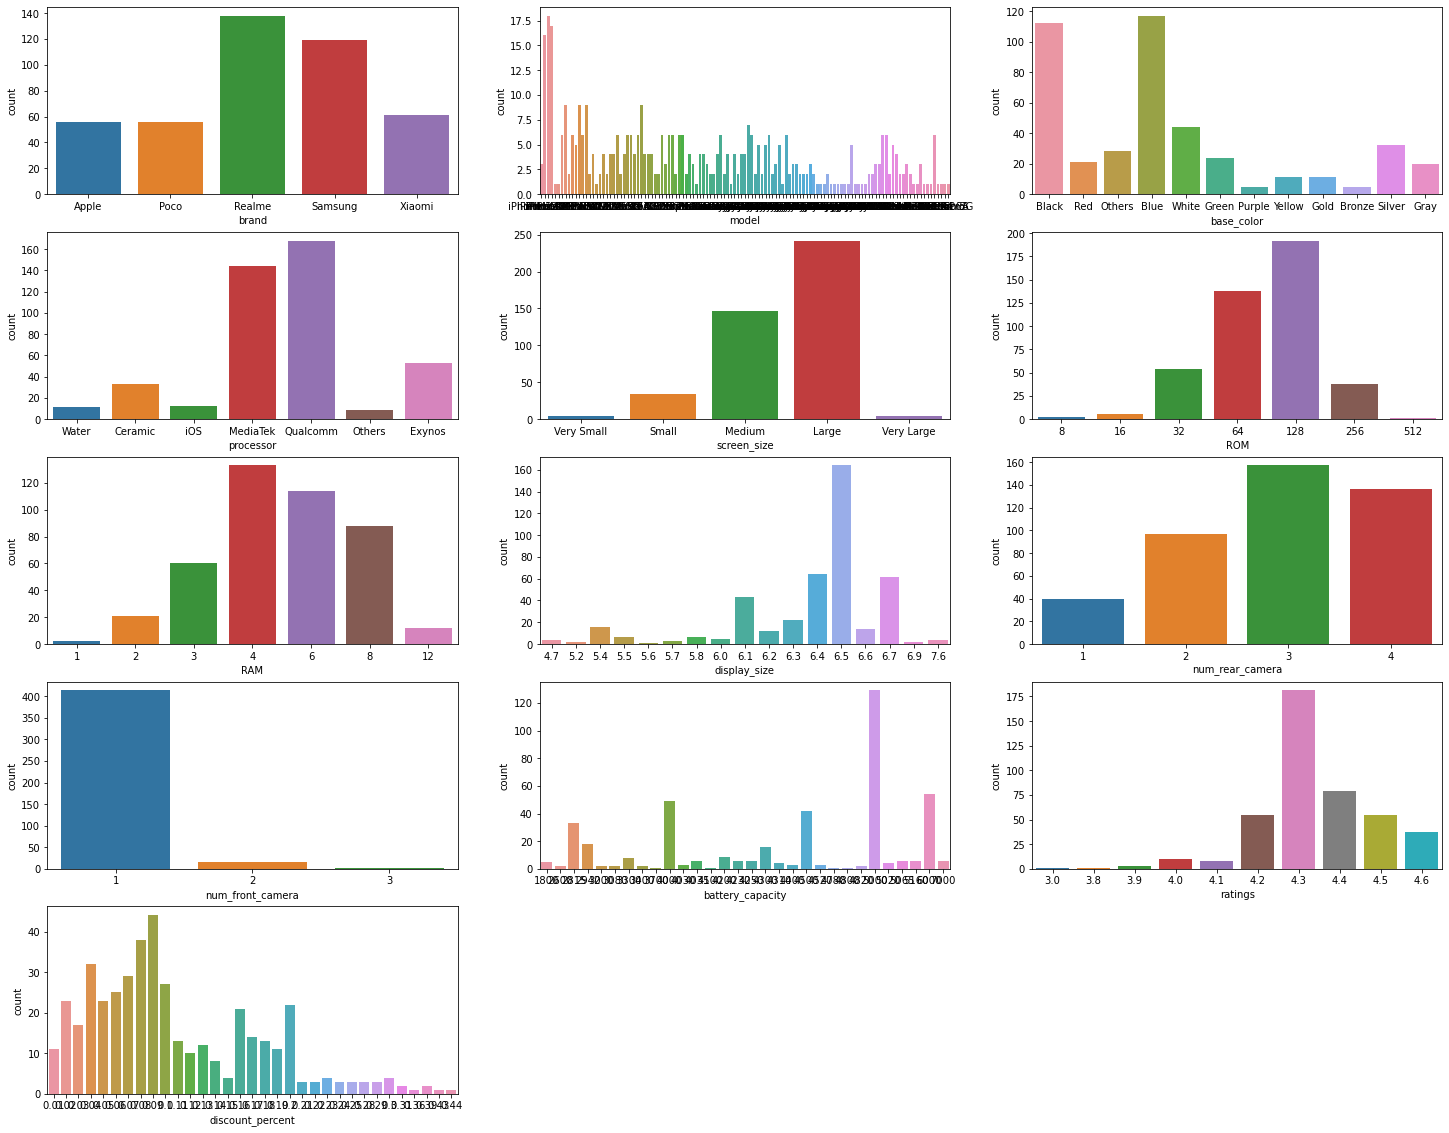

In [15]:
plt.rcParams["figure.figsize"]=[25,20]
c=1
for i in cat_var:
    plt.subplot(5,3,c)
    sns.countplot(mobile[i])
    c=c+1
plt.show()

In [16]:
#highest no of mobile_models are in stock "iphone xr", "iphone 12", "iphone 12 mini"
print(mobile[["model"]].value_counts().sort_values(ascending=False).head(5))

model         
iPhone XR         18
iPhone 12         17
iPhone 12 Mini    16
X3                 9
M2 Pro             9
dtype: int64


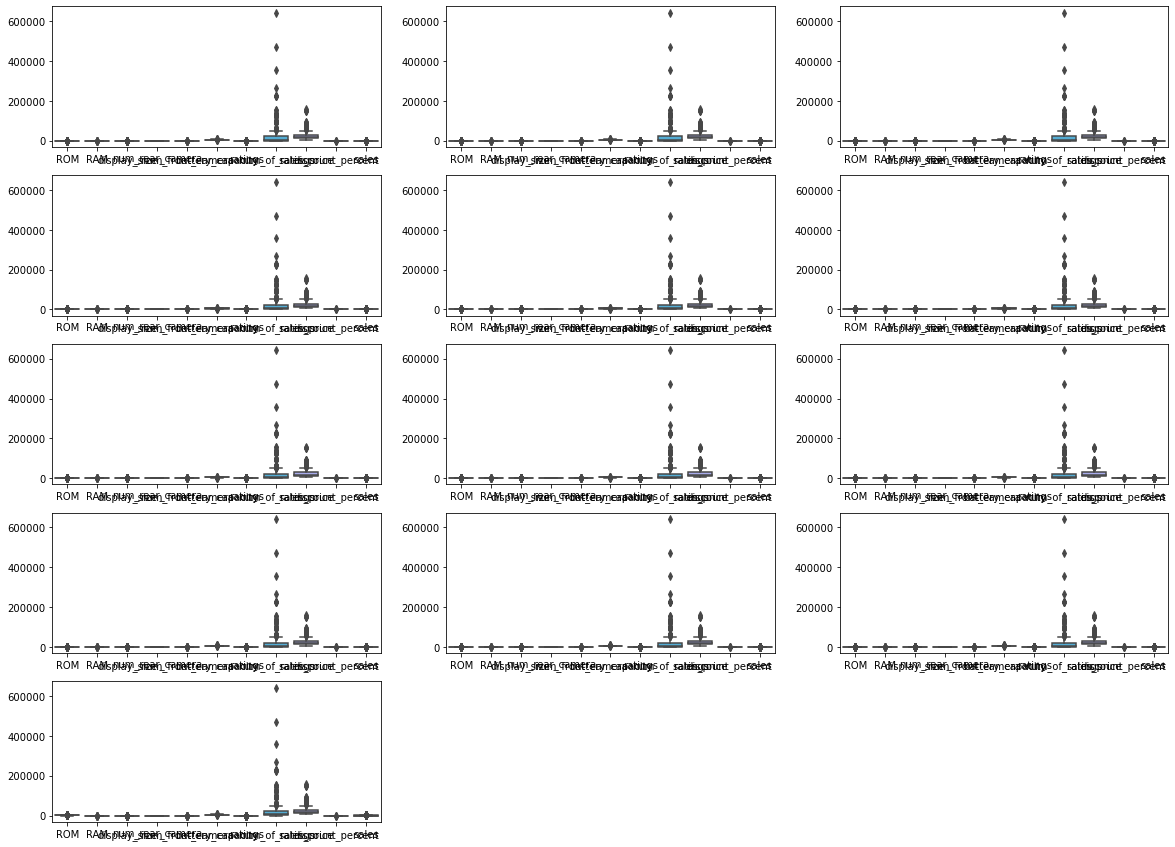

In [17]:
#outlair analysis
plt.rcParams["figure.figsize"]=[20,15]
c=1
for i in cat_var:
    plt.subplot(5,3,c)
    sns.boxplot(data=mobile)
    c=c+1
plt.show()

In [21]:
#correlation close to 0.5
corr=mobile.corr()


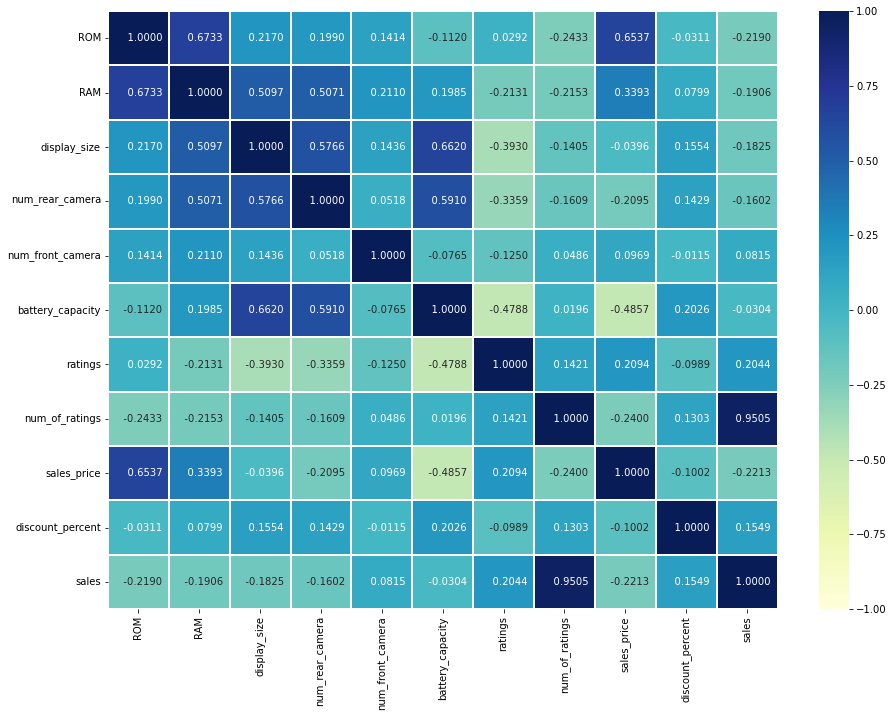

In [23]:
plt.rcParams["figure.figsize"]=[15,11]
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')

# display the plot
plt.show()
#we can see here high correlation between "no_of_ratings" and "sales"

# Bivariate Analysis

## Num vs Num

<AxesSubplot:xlabel='num_of_ratings', ylabel='sales'>

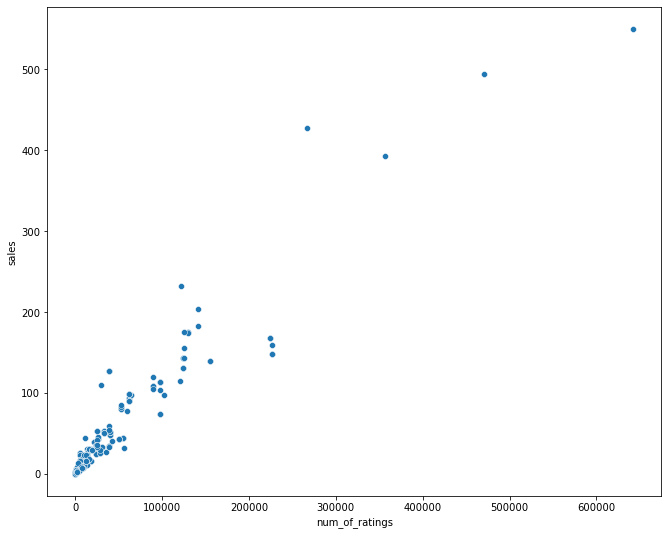

In [24]:
#Numerical variable#

#num_of_ratings vs sales
plt.rcParams["figure.figsize"]=[11,9]
sns.scatterplot(mobile.num_of_ratings,mobile.sales)

#if num_of_ratings is increses sales would be increse

<AxesSubplot:xlabel='num_of_ratings', ylabel='sales'>

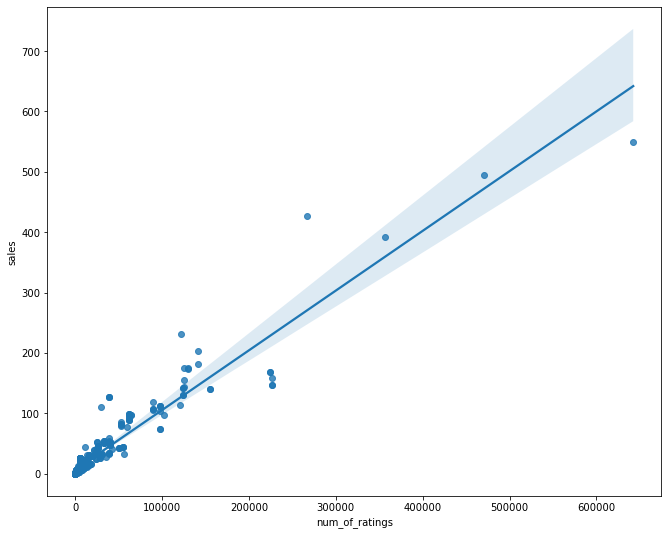

In [25]:
#Numerical variable#

#num_of_ratings vs sales
plt.rcParams["figure.figsize"]=[11,9]
sns.regplot(mobile.num_of_ratings,mobile.sales)

#if num_of_ratings is increses sales would be increse

<AxesSubplot:xlabel='sales_price', ylabel='sales'>

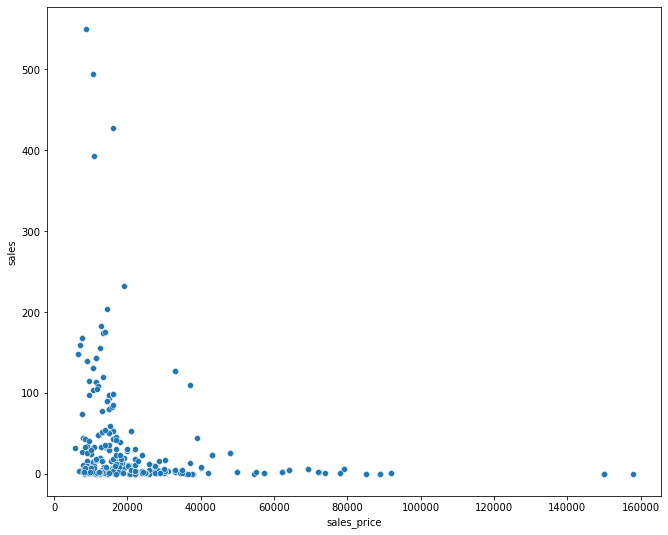

In [26]:
#sales_price vs sales
plt.rcParams["figure.figsize"]=[11,9]
sns.scatterplot(mobile.sales_price,mobile.sales)

#20,000 mrp phones have highest sale,#when sales_price is between 20,000 to 40,000 sales is very high

## Num vs Cat

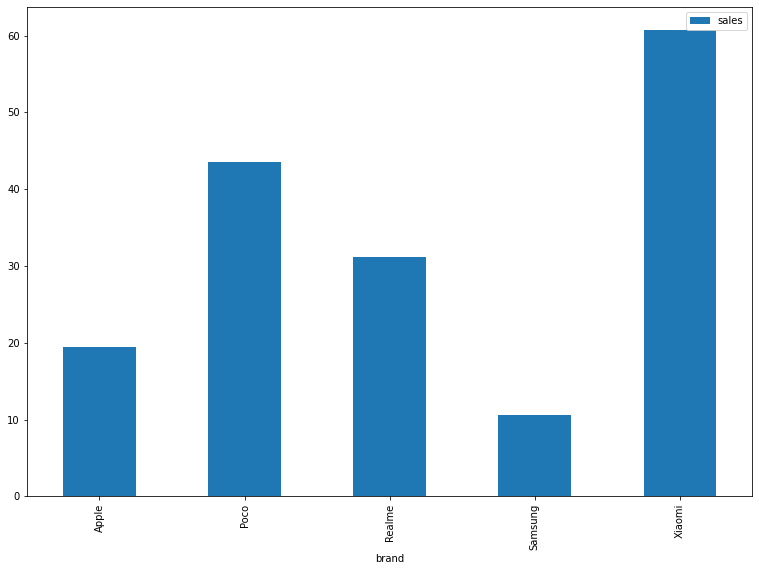

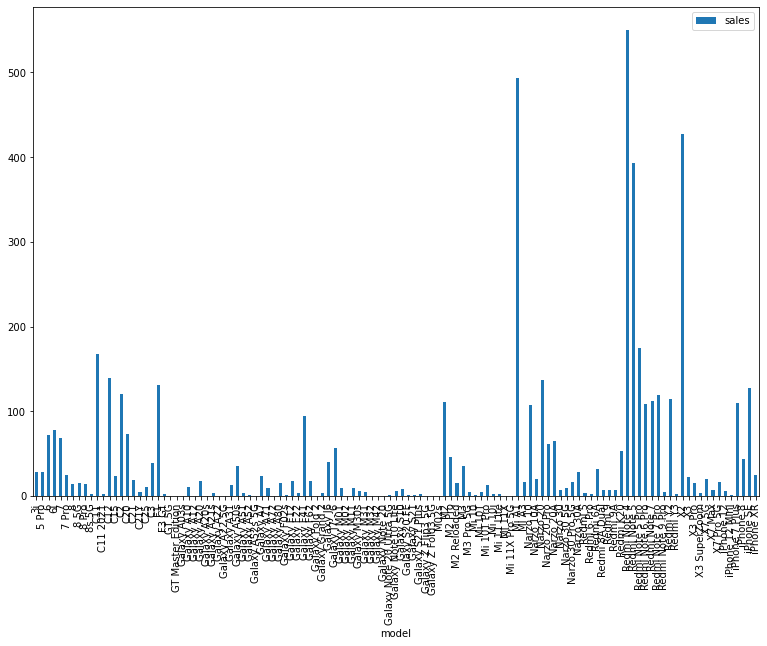

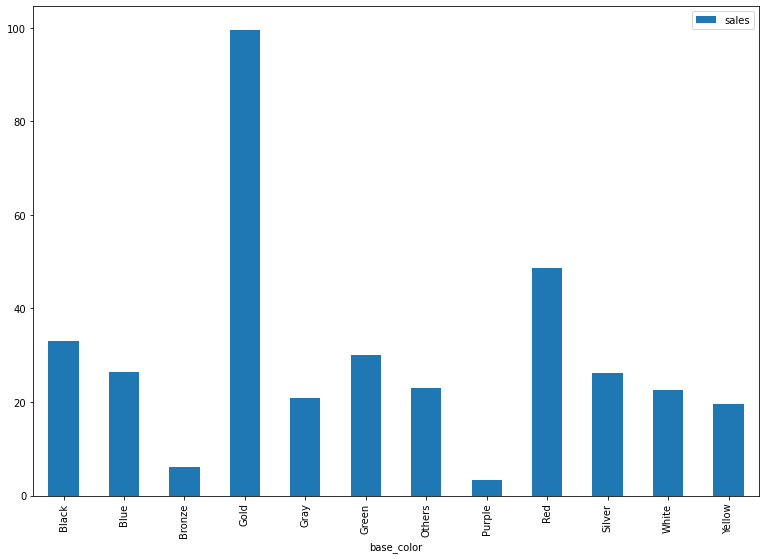

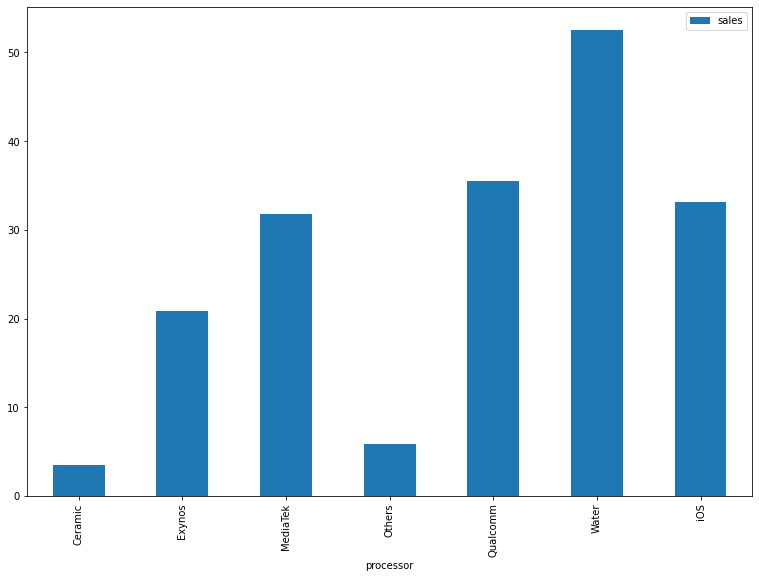

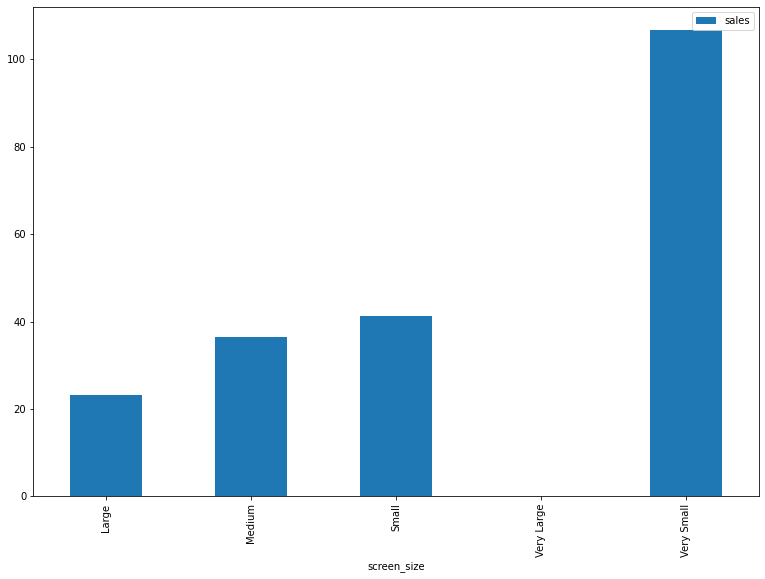

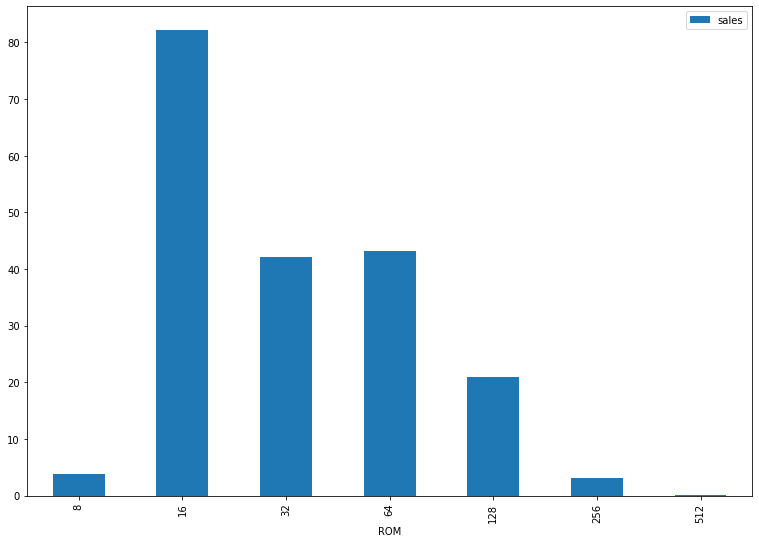

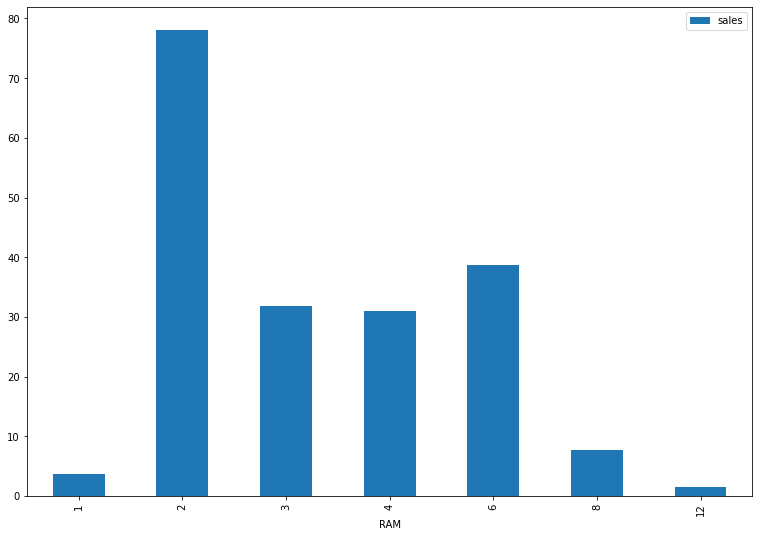

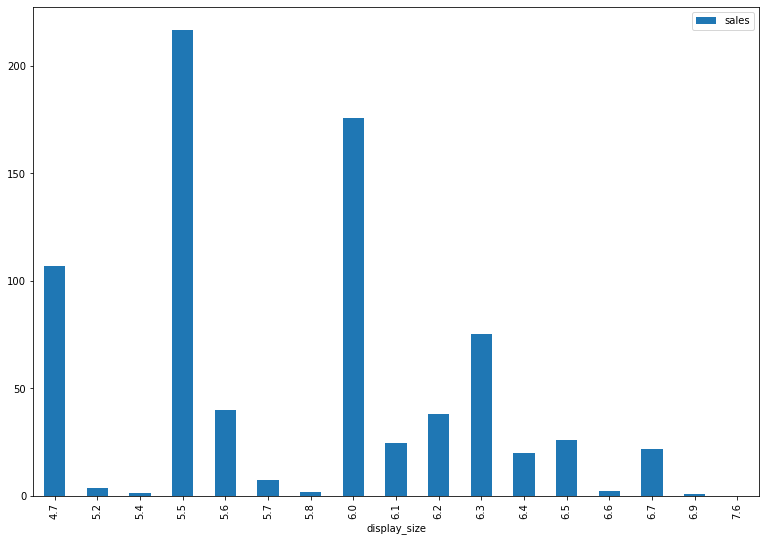

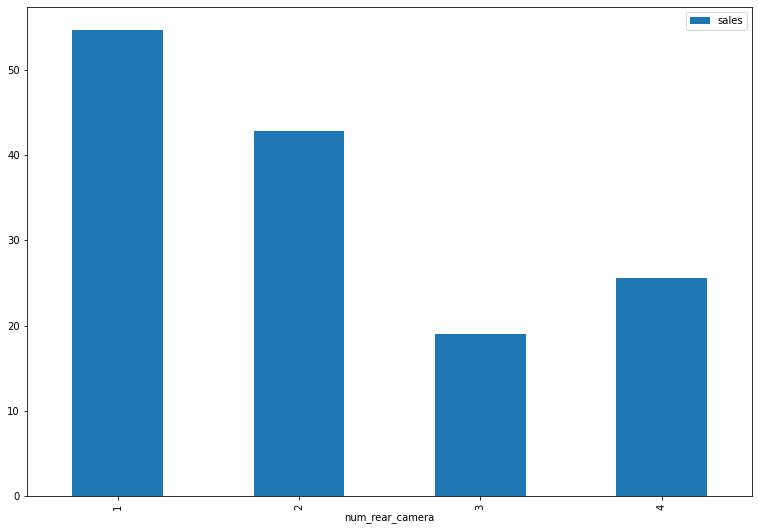

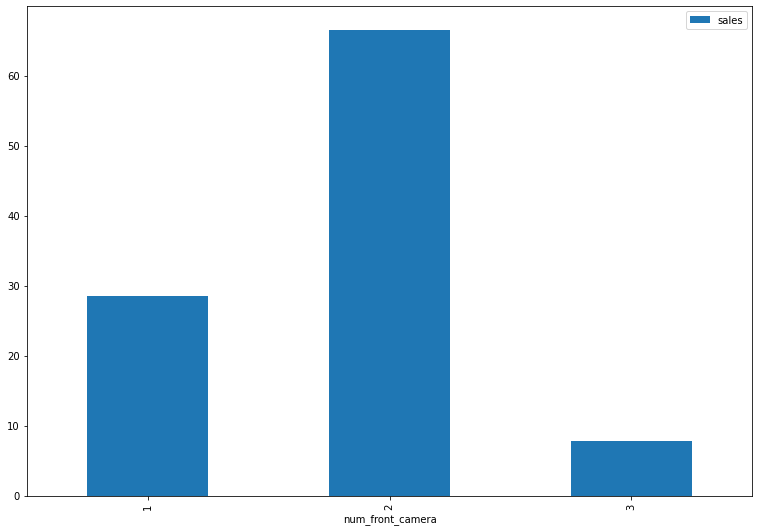

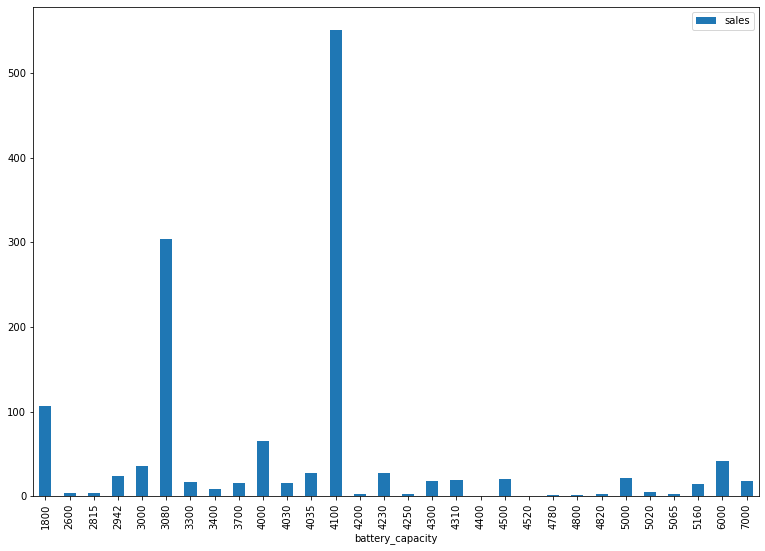

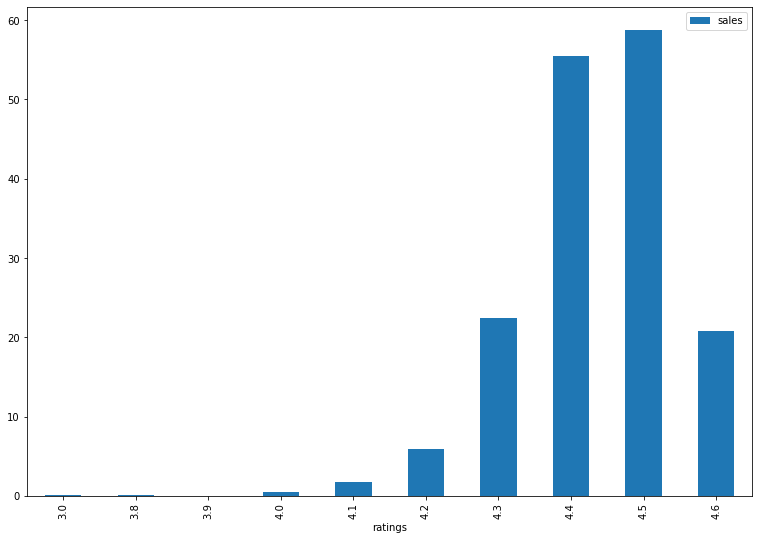

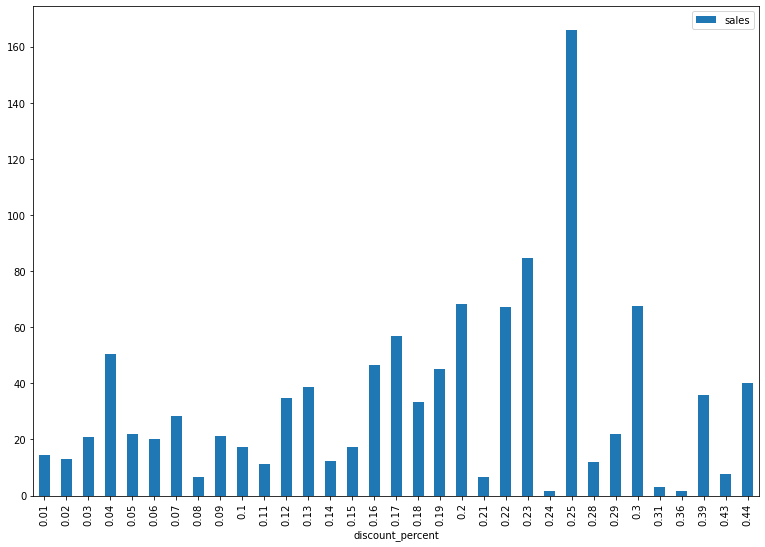

In [27]:
plt.rcParams["figure.figsize"]=[13,9]
for i in cat_var:
    mobile.groupby(mobile[i])[["sales"]].mean().plot(kind="bar")
plt.show()

In [ ]:
# brand vs sales
#Xiaomi and poco phones have highest sales

#



#base_color vs sales
#Gold and red color have highest sales
#Bronze and purple color have lowest sales


#processor vs sales
#water and qualcomm have highest sales
#ceramic and others have lowest sales

#screen_size vs sales
#very small have highest sales
#very large have lowest sales

#ROM vs Sales
#16 gb Rom have highest sales
#512 gb Rom have lowest sales


#RAM vs sales
#2gb Ram have highest sales
#12 gb Ram have lowest sales

#display_size vs sales
#display_size of 5.5 and 6.0 have highest sales
#display_size of 6.9 have lowest sales,7 is not sales

#1 rear camera have highest sales

#4100 & 3080 mah battery have highest sales

#4.5 ratings phones have highest sales
#3.9 ratings phones have no sales


#0.23 & 0.25 % discount phones have highest sales


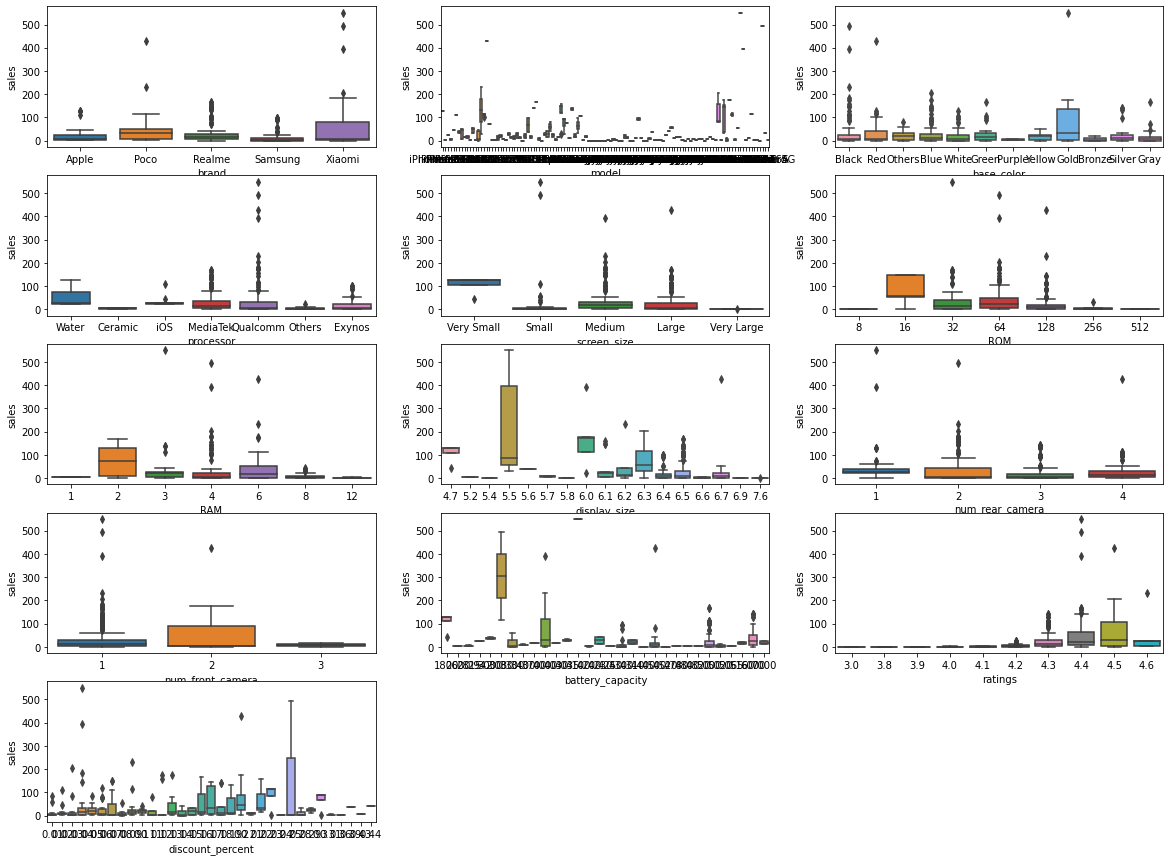

In [28]:
#outlair analysis
plt.rcParams["figure.figsize"]=[20,15]
c=1
for i in cat_var:
    plt.subplot(5,3,c)
    sns.boxplot(x=mobile[i],y='sales',data=mobile)
    c=c+1
plt.show()

<AxesSubplot:xlabel='sales'>

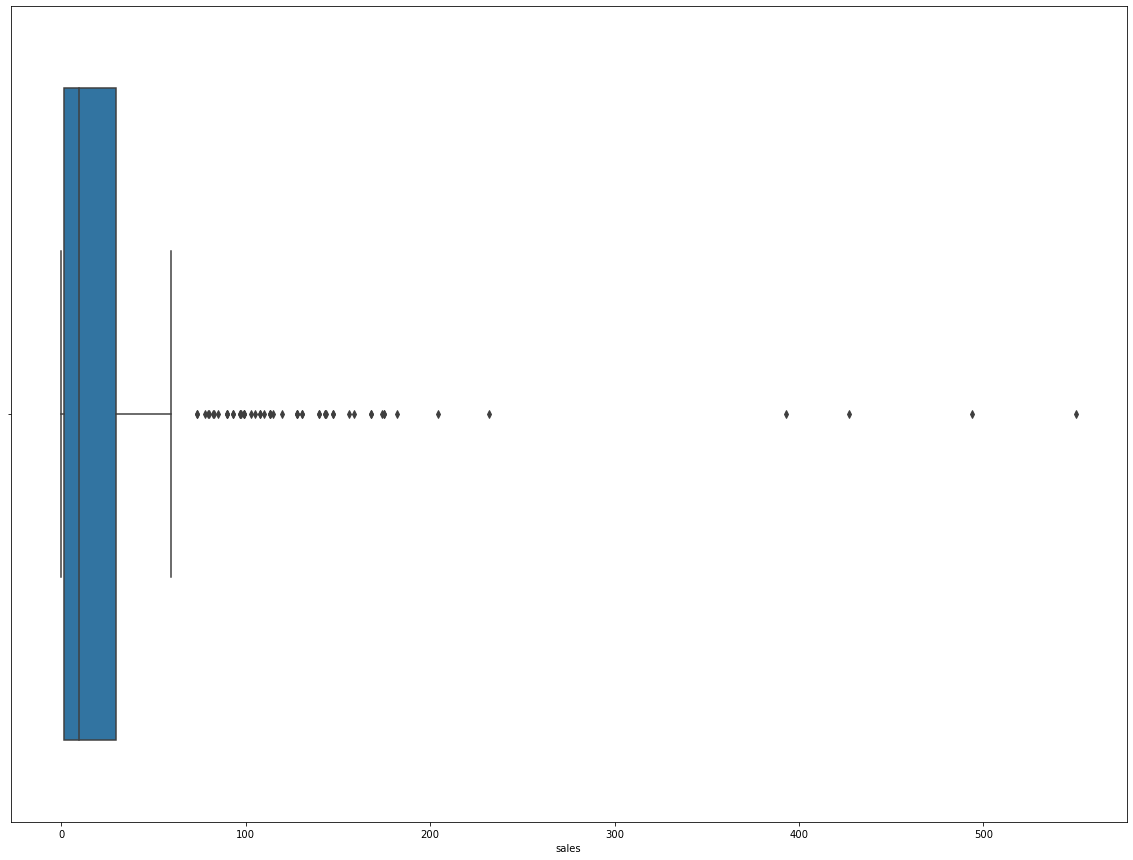

In [29]:
sns.boxplot(mobile.sales)

<AxesSubplot:>

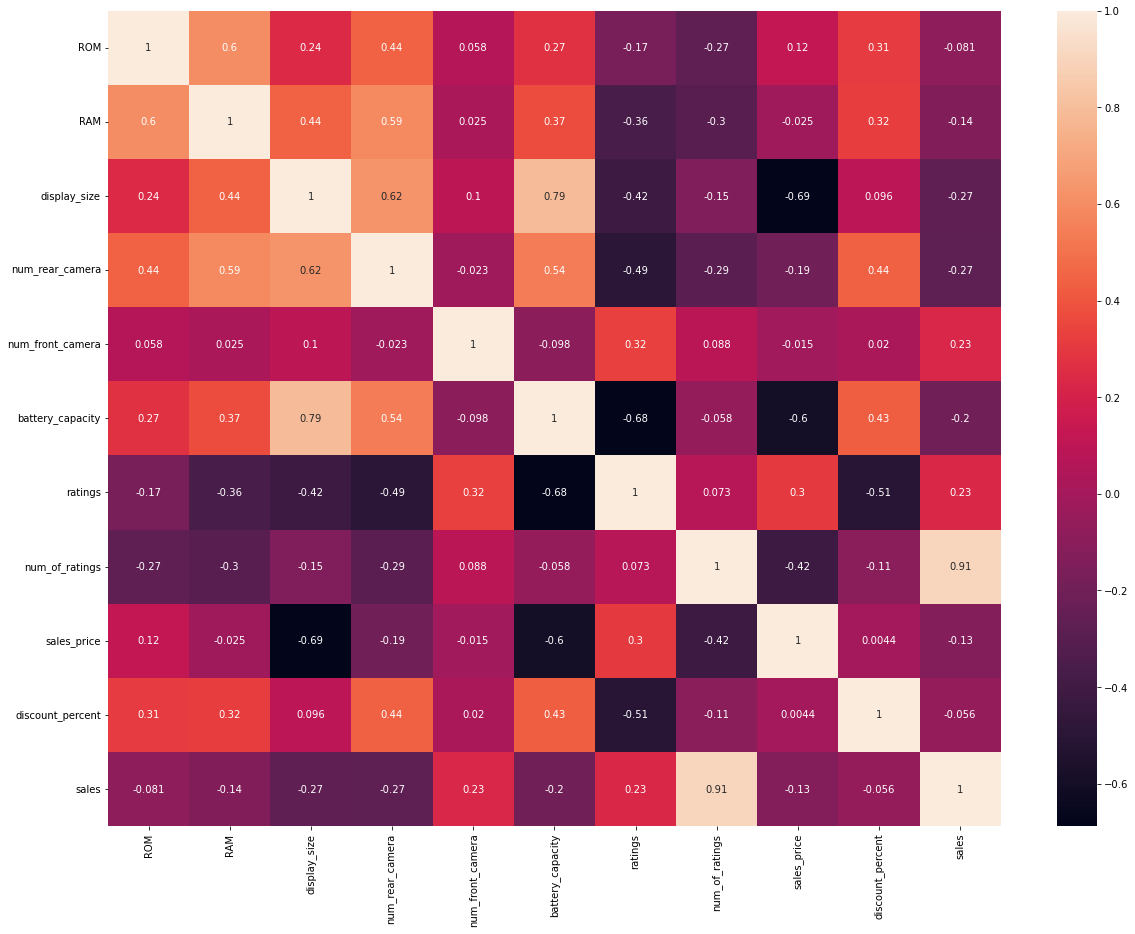

In [30]:
q1=mobile["sales"].quantile(0.25)
q3=mobile["sales"].quantile(0.75)
iqr=q3-q1
sns.heatmap(mobile.loc[(mobile["sales"]>q3+1.5*iqr)|(mobile["sales"]<q1-1.5*iqr)].corr(),annot=True)

<AxesSubplot:>

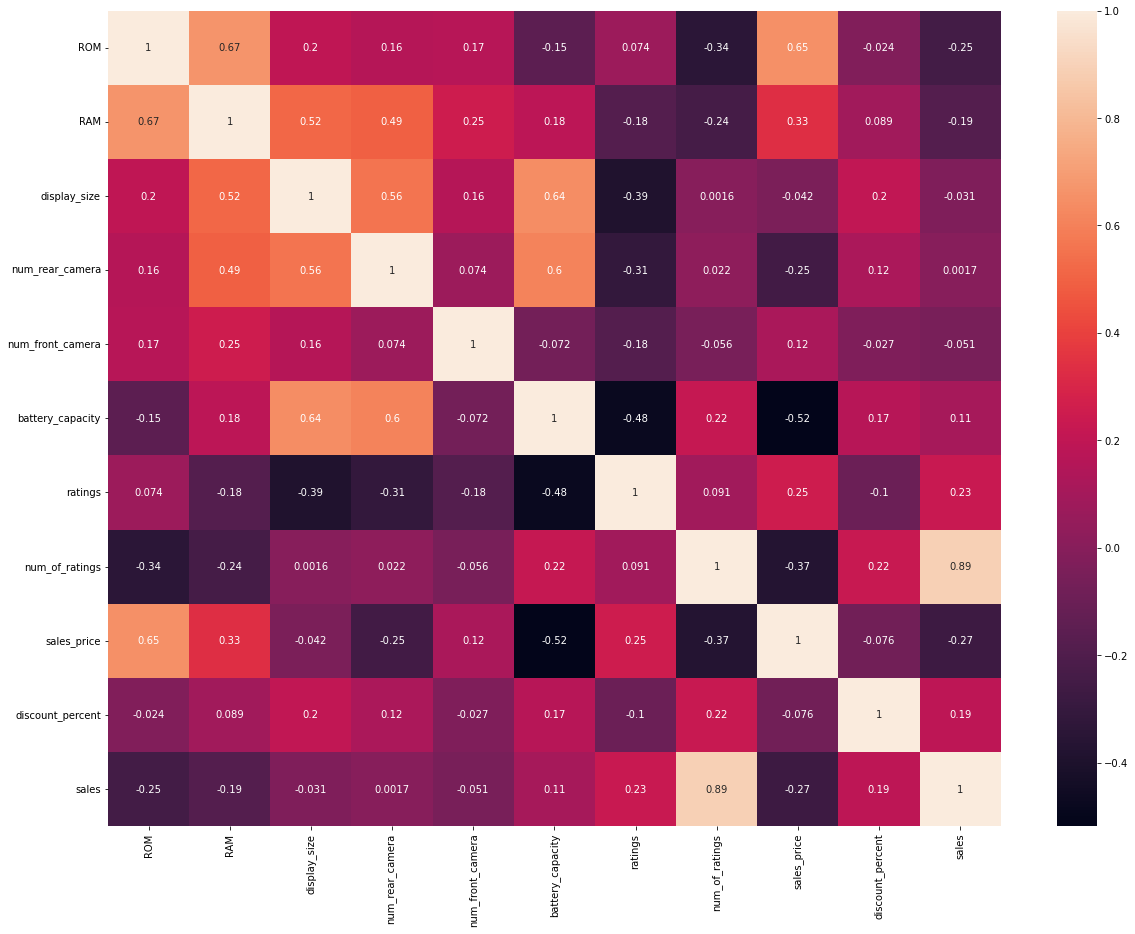

In [31]:
sns.heatmap(mobile.loc[~((mobile["sales"]>q3+1.5*iqr)|(mobile["sales"]<q1-1.5*iqr))].corr(),annot=True)

In [32]:
#Xiaomi and Realme brand and most sales
mobile.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [ ]:
mobile.groupby("model")[["sales"]].mean()

In [ ]:
mobile.groupby("processor")[["sales"]].mean().plot(kind="bar")

In [ ]:
mobile.groupby("processor")[["sales"]].mean()

In [ ]:
mobile.groupby("base_color")[["sales"]].mean().plot(kind='bar')

In [ ]:
mobile.groupby("base_color")[["sales"]].mean()

In [ ]:
mobile.groupby("screen_size")[["sales"]].mean().plot(kind="bar")

In [ ]:
mobile.groupby("screen_size")[["sales"]].mean()

In [ ]:
brand=mobile.groupby("model")[["sales"]].mean()

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
brand

In [ ]:
mobile[mobile['sales'] > 400]

In [ ]:
mobile.sort_values(by='sales',ascending=False).head(5)

In [ ]:
# Realme_brand and Samsung brand are most saled phone comparing to other 

In [ ]:
mobile.head()

In [ ]:
mobile.processor.value_counts()

In [ ]:
#unique value in variables
mobile.apply(lambda x:len(x.unique()))

In [ ]:
# plot the boxplot to visualize the outliers
plt.boxplot(mobile.sales_price, vert = False)

In [ ]:
sns.distplot(mobile.loc[:,"sales_price"])

In [ ]:
mobile.select_dtypes(include=np.number).columns

In [ ]:
# plot dimensions
plt.rcParams['figure.figsize']=[20, 10]
n_rows = 4
n_cols = 3
counter = 1
for i in num1:
    plt.subplot(n_rows, n_cols, counter)
    sns.distplot(mobile.loc[:, i].dropna())
    counter = counter+1
    
plt.tight_layout() # to remove the clutters
plt.show()

In [ ]:
mobile.head()

In [ ]:
#Categorical Variable
mobile.brand.value_counts()

In [ ]:
mobile.base_color.value_counts()

In [ ]:
#Drop duplicates
mobile.drop_duplicates(inplace=True)

In [ ]:
mobile.duplicated().sum()

In [ ]:
import pandas
import random

n = 1000000 #number of records in file
s = 100000 #desired sample size
filename = "Mobile.csv"
skip = sorted(random.sample(range(n),n-s))
df = pandas.read_csv(filename, skiprows=skip)

In [ ]:
df.shape

In [ ]:
mobile.var()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(mobile[["num_of_ratings","sales_price"]])
y=scaler.fit_transform(mobile[["sales"]])

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.15)
reg=LinearRegression()
model=reg.fit(Xtrain,ytrain)
pred=model.predict(Xtest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,pred)

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
4964/8000